In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+179.g317ccac.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 90
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    groundscan = analysis.groundAnalysis(scene, sensorsground=sensorsground)
    ground = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x >= 1 and x <= pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Front
Saved: results/irr_groundscan2.csv
{'Wm2': [16.10384, 16.72513], 'x': [0.0, 5.7], 'y': [0.0, 3.490243e-16], 'z': [0.05, 0.05], 'r': [16.10384, 16.72513], 'g': [16.10384, 16.72513], 'b': [16.10384, 16.72513], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Front'}

sensorsground: 3
Linescan in process: groundscan3_Front


/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Saved: results/irr_groundscan3.csv
{'Wm2': [16.58538, 958.918, 16.85241], 'x': [0.0, 2.85, 5.7], 'y': [0.0, 1.745122e-16, 3.490243e-16], 'z': [0.05, 0.05, 0.05], 'r': [16.58538, 958.918, 16.85241], 'g': [16.58538, 958.918, 16.85241], 'b': [16.58538, 958.918, 16.85241], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Front'}

sensorsground: 5
Linescan in process: groundscan5_Front
Saved: results/irr_groundscan5.csv
{'Wm2': [17.04203, 958.9191999999999, 958.6704999999998, 954.5369, 16.74776], 'x': [0.0, 1.425, 2.85, 4.275, 5.7], 'y': [0.0, 8.725608e-17, 1.745122e-16, 2.617683e-16, 3.490243e-16], 'z': [0.05, 0.05, 0.05, 0.05, 0.05], 'r': [17.04203, 958.9192, 958.6705, 954.5369, 16.74776], 'g': [17.04203, 958.9192, 958.6705, 954.5369, 16.74776], 'b': [17.04203, 958.9192, 958.6705, 954.5369, 16.74776], 'mattype': ['groundplane', 'groundplane', 'groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan5_Front'}

sensorsground: 10
Linescan in process: g

Saved: results/irr_groundscan150.csv
{'Wm2': [17.0384, 16.76649, 16.49458, 16.73608, 17.33035, 17.92463, 20.96149, 21.983999999999998, 23.006510000000002, 32.64294, 34.20362, 35.76431, 75.54832, 882.1238, 885.8206999999999, 927.4897, 933.3121, 939.1345, 944.8939999999999, 947.6091, 950.3241000000002, 951.7927, 952.547, 953.3013, 954.0555, 954.8098, 955.564, 956.3183, 957.5539, 957.6244, 957.6947999999999, 957.7653999999999, 957.8358, 957.9063, 957.9768, 958.0472999999998, 958.1178, 959.2975, 959.2958, 959.2941, 959.2925, 959.2908000000001, 959.2892, 959.2875, 959.2858, 959.2842, 959.2824999999999, 959.2809000000001, 959.2792, 959.2776, 959.2759, 959.2742, 959.2725999999999, 959.2709, 959.2693, 959.2676, 959.3734, 959.3765, 959.3795999999999, 959.3827, 959.3858, 959.3889, 959.3920000000002, 959.3951000000001, 959.3982, 959.4013, 959.4044, 959.4074999999999, 959.4106, 959.4137, 959.4167000000001, 959.4199, 959.4230000000001, 959.426, 959.4291, 959.4323, 959.4353, 959.4384999999999, 959.4

Saved: results/irr_groundscan200.csv
{'Wm2': [16.66228, 16.51893, 16.37558, 16.84489, 17.10133, 17.35777, 17.61421, 19.24789, 19.95198, 20.65606, 25.2513, 26.17322, 27.09514, 39.22734, 40.63985, 42.05236, 75.49603, 881.1421999999999, 883.9097, 919.3635, 923.6066999999999, 927.8499, 938.1695999999998, 941.7199999999999, 945.2705, 948.821, 949.8271, 950.7125, 951.5978, 952.4829999999998, 953.3683, 954.9904, 955.1617, 955.333, 955.5043, 955.6754999999999, 955.8469, 956.0182, 957.522, 957.5165000000001, 957.5112, 957.5057, 957.5003, 957.4949, 957.4895, 957.4841, 957.4786, 957.4733, 957.4678, 957.4624, 957.457, 957.4516, 957.4462, 957.4408, 959.5674, 959.574, 959.5804000000002, 959.587, 959.5935, 959.6, 959.6065, 959.6129999999999, 959.6196, 959.6261, 959.6326, 959.6391, 959.6456, 959.6520999999999, 959.6587, 959.6652, 959.6717, 959.6782, 959.6847000000001, 959.2632, 959.2662, 959.2689999999999, 959.272, 959.2748, 959.2778, 959.2806, 959.2836000000001, 959.2864, 959.2894, 959.2922, 959.2952

Saved: results/irr_groundscan250.csv
{'Wm2': [17.06973, 16.98913, 16.90852, 16.82792, 16.43827, 16.70155, 16.96484, 17.22812, 18.63647, 19.18018, 19.7239, 20.26762, 24.114819999999998, 24.81911, 25.52342, 26.22772, 37.42651, 38.52109, 39.61568, 40.71026, 75.2399, 880.3229, 882.5275, 884.7320999999998, 921.0801, 924.2659, 927.4517, 930.6375000000002, 939.6044, 942.282, 944.9596, 947.6371, 950.3147, 949.8350999999999, 950.6262, 951.4173, 952.2084, 952.9995, 953.7905999999999, 954.4031, 954.4935, 954.5839, 954.6743, 954.7648, 954.8552, 954.9456, 955.0359, 955.1263, 955.2168, 957.6613000000001, 957.7163, 957.7714, 957.8265, 957.8815, 957.9366, 957.9917, 958.0468, 958.1019, 958.1569, 958.212, 958.2671, 958.3221, 958.3773, 959.4427, 959.4399, 959.437, 959.4341, 959.4312999999999, 959.4285, 959.4256, 959.4227, 959.4199, 959.4171, 959.4142, 959.4113000000001, 959.4083999999999, 959.4056, 959.4028, 959.3999, 959.3971, 959.3942000000001, 959.3914, 959.3885, 959.3856, 959.3828, 959.3799, 959.3771

Saved: results/irr_groundscan300.csv
{'Wm2': [16.67346, 16.55432, 16.43518, 16.31604, 16.1969, 16.07776, 17.0258, 17.39436, 17.76291, 18.13147, 18.50003, 20.00026, 20.48656, 20.97286, 21.45916, 21.94546, 27.282259999999997, 27.94641, 28.610560000000003, 29.27471, 29.938859999999995, 47.403870000000005, 48.54695999999999, 49.69004, 50.83312, 854.8547, 899.1475999999999, 901.4955, 903.8434000000001, 906.1913, 908.5392, 931.3436, 934.3345, 937.3254000000001, 940.3163, 943.3071999999999, 944.9312999999999, 946.2311999999998, 947.5311, 948.831, 950.1309, 951.4308, 952.0958, 952.5315999999999, 952.9675000000001, 953.4033, 953.8391, 954.2749, 954.7108, 955.1465, 955.5012, 955.5483, 955.5954, 955.6425, 955.6896, 955.7365999999998, 955.7837, 955.8308000000001, 955.8779, 955.9249, 955.9720000000001, 956.0191, 956.0661999999999, 956.1133, 956.1603, 958.9377, 958.9558000000001, 958.9739, 958.9921, 959.0102, 959.0283, 959.0463999999998, 959.0646, 959.0827, 959.1008, 959.119, 959.1371, 959.1552, 959

Saved: results/irr_groundscan400.csv
{'Wm2': [16.58947, 16.50656, 16.42365, 16.34073, 16.25783, 16.17492, 16.42913, 16.5601, 16.69106, 16.82203, 16.953, 17.08397, 18.32697, 18.6588, 18.99064, 19.32247, 19.65431, 19.98614, 22.65631, 23.070180000000004, 23.48405, 23.89792, 24.3118, 24.725669999999997, 32.80166, 33.39347, 33.98527, 34.57708, 35.16888, 35.76069, 59.21721, 60.29979, 61.38237999999999, 865.3434000000001, 866.426, 867.5086, 907.7325, 909.6497, 911.567, 913.4842, 915.4015, 917.3187000000001, 933.4332, 935.727, 938.0207, 940.3145, 942.6082, 944.9019, 944.6698, 945.6475999999999, 946.6254, 947.6030999999999, 948.581, 949.5588000000001, 950.5366, 951.5144, 952.4922, 952.0452, 952.2316, 952.4181, 952.6046, 952.791, 952.9775, 953.1639, 953.3503999999999, 953.5369, 953.7234, 953.9099, 954.0963, 956.1574, 956.2072, 956.2568, 956.3066, 956.3563, 956.406, 956.4557, 956.5054999999999, 956.5552000000001, 956.6048999999999, 956.6546, 956.7043, 956.754, 956.8038, 956.8535, 956.9033, 956.95

Saved: results/irr_groundscan500.csv
{'Wm2': [16.58128, 16.54472, 16.50816, 16.47159, 16.43502, 16.39846, 16.36189, 16.62536, 16.73201, 16.83866, 16.94531, 17.05196, 17.15861, 17.26525, 17.49213, 17.74637, 18.00062, 18.25486, 18.50911, 18.76335, 19.0176, 21.55944, 21.873640000000005, 22.187840000000005, 22.502040000000004, 22.816240000000004, 23.130440000000004, 23.444640000000003, 28.86878, 29.28804, 29.7073, 30.12656, 30.545820000000003, 30.96508, 31.384339999999998, 47.28625, 47.9716, 48.65695, 49.3423, 50.02765, 50.71299, 854.2768, 890.3824, 891.6616, 892.9408, 894.2199999999999, 895.4991, 896.7783, 898.0575, 922.9822, 924.7370999999999, 926.4919, 928.2468, 930.0017000000001, 931.7566, 933.5115, 939.7347, 940.8685, 942.0023, 943.1362, 944.27, 945.4038, 946.5376, 947.6713999999998, 948.8052000000001, 948.6848999999999, 949.1376999999999, 949.5904999999999, 950.0432999999999, 950.4961, 950.9489, 951.4017, 951.8545, 952.3073, 952.7601, 953.2129, 954.0744, 954.1317, 954.1891, 954.2464,

In [14]:
results

[nan,
 330.7852633333333,
 581.183278,
 763.1193529999999,
 766.093556,
 767.7238403333333,
 778.3930851999999,
 781.4201494,
 783.0872162,
 787.0569332,
 787.2136502999999,
 787.1690138250002,
 788.93400022]

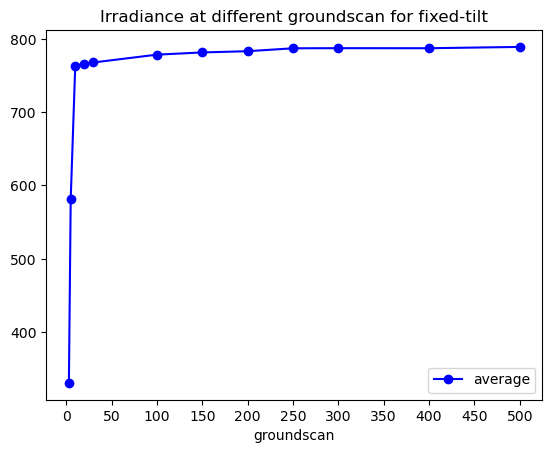

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()